For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?

Has the network latency gone up since we switched ISPs (company2)?
H0 = latency is <= overall average
Ha = latency is > than overall average
False P = internet outage for Company 1
false N = internet outage for company 2

Is our TV ad driving more sales?
-number of "average sales" from the ad that was introduced during the super bowl are the same or lower
-number of "average number" of sales from the ad that was introduced during the super bowl are higher
true positive- sales revenue show that the profits increased during the super bowl
false positive- the item from the TV ad was also gaining revenue from adds on facebook
true negative- sales stayed the same even with the super bowl ad
false negative- the amount of viewers for the super bowl this year was the lowest ever.

#Exercises

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

H_O: Average time to sell at office 1 == average time to sell at office 2
H_a: Average time to sell at office 1 != average time to sell at office 2

In [2]:
alpha = .05

In [3]:
#Home office 1 mean and std 
h1_mean = 90
h1_std = 15
h1 = 90, 15

In [4]:
#Home office 2 mean and std 
h2_mean = 100
h2_std = 20
h2 = 100, 20

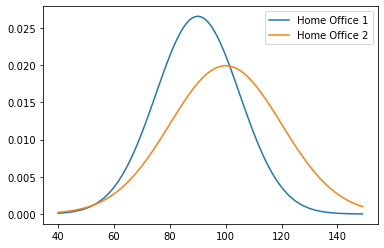

In [5]:
x = np.arange(40, 150)

h1 = stats.norm(90, 15).pdf(x)
h2 = stats.norm(100, 20).pdf(x)

plt.plot(x,h1, label = 'Home Office 1')
plt.plot(x,h2, label = 'Home Office 2')

plt.legend()

In [6]:
#calculate T & P
t,p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [7]:
# Comparing P value versus alpha

if p < alpha:
    print("We reject null hypothesis")
else:
    print("We failed to reject null hypothesis")

We reject null hypothesis


Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [8]:
from pydataset import data
mpg = data('mpg')

In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
# getting year values count
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [11]:
# H_O: There is no fuel effiecincy difference between 2008 and 1999 vehicles
# H_a: There is a fuel effiecincy difference between 2008 and 1999 vehicles

mpg['avg_fuel_e'] = stats.hmean(mpg[['cty' , 'hwy']], axis=1)
mpg.head()

In [12]:
mpg['avg_fuel_e'] = (mpg.hwy + mpg.cty) / 2 
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [13]:
fuel_e_08 = mpg[mpg.year == 2008].avg_fuel_e
fuel_e_99 = mpg[mpg.year == 1999].avg_fuel_e

<AxesSubplot:>

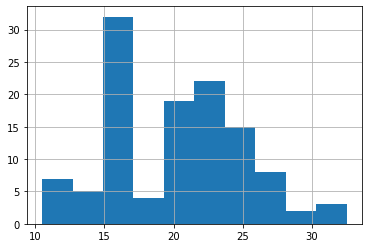

In [14]:
fuel_e_08.hist() 

<AxesSubplot:>

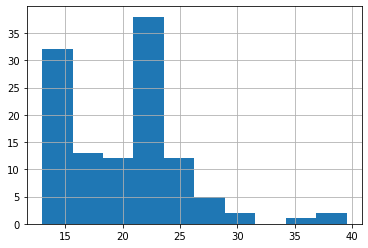

In [15]:
fuel_e_99.hist()

In [16]:
#variance of years
fuel_e_08.var(), fuel_e_99.var()

(24.097480106100797, 27.122605363984682)

In [17]:
t, p = stats.ttest_ind(fuel_e_08, fuel_e_99)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [18]:
if p < alpha:
    print('Reject null')
else:
    print('Failed to reject null')

Failed to reject null


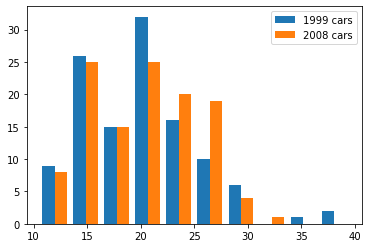

In [19]:
plt.hist([fuel_e_99, fuel_e_08], label=['1999 cars', '2008 cars'])
plt.legend()

In [20]:
# H_0: MPG for compact cars <= mpg for the average car
# H_a: MPG for compact cars > mpg for the average car

In [21]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fuel_e
pop_mean = mpg.avg_fuel_e.mean()

pop_mean

20.14957264957265

In [22]:
fe_compact.mean()

24.21276595744681

<AxesSubplot:>

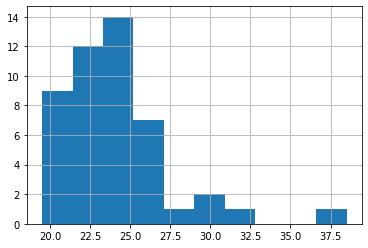

In [23]:
fe_compact.hist()

In [24]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [25]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null


Correlation Exercises

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import pydataset
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:
#import telco churn data
telco = pd.read_csv("telco_raw_data.csv")
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [28]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
telco = telco[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService', 'PhoneService']]
telco


,tenure,MonthlyCharges,TotalCharges,InternetService,PhoneService
0,1,29.85,29.85,DSL,No
1,34,56.95,1889.50,DSL,Yes
2,2,53.85,108.15,DSL,Yes
3,45,42.30,1840.75,DSL,No
4,2,70.70,151.65,Fiber optic,Yes
...,...,...,...,...,...
7038,24,84.80,1990.50,DSL,Yes
7039,72,103.20,7362.90,Fiber optic,Yes
7040,11,29.60,346.45,DSL,No
7041,4,74.40,306.60,Fiber optic,Yes


In [30]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   MonthlyCharges   7043 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   InternetService  7043 non-null   object 
 4   PhoneService     7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


In [31]:
telco.sort_values(by='TotalCharges')

,tenure,MonthlyCharges,TotalCharges,InternetService,PhoneService
1654,1,18.80,18.80,No,Yes
6489,1,18.85,18.85,No,Yes
1151,1,18.85,18.85,No,Yes
4939,1,18.90,18.90,No,Yes
583,1,19.00,19.00,No,Yes
...,...,...,...,...,...
3826,0,25.35,NaN,No,Yes
4380,0,20.00,NaN,No,Yes
5218,0,19.70,NaN,No,Yes
6670,0,73.35,NaN,DSL,Yes


In [32]:
telco[telco.isnull().any(axis=1)]

,tenure,MonthlyCharges,TotalCharges,InternetService,PhoneService
488,0,52.55,NaN,DSL,No
753,0,20.25,NaN,No,Yes
936,0,80.85,NaN,DSL,Yes
1082,0,25.75,NaN,No,Yes
1340,0,56.05,NaN,DSL,No
3331,0,19.85,NaN,No,Yes
3826,0,25.35,NaN,No,Yes
4380,0,20.00,NaN,No,Yes
5218,0,19.70,NaN,No,Yes
6670,0,73.35,NaN,DSL,Yes


In [33]:
# Dropped Null values(11 records)
telco1 = telco.dropna()
telco1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   InternetService  7032 non-null   object 
 4   PhoneService     7032 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 329.6+ KB


H_0: There is no linear relationship between tenure and monthly charges.

H_a: There is there a linear relationship between tenure and monthly charges.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

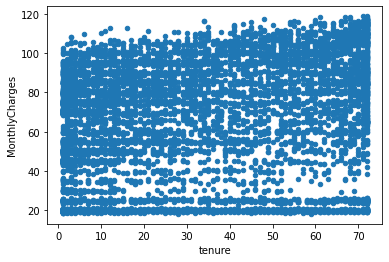

In [34]:
telco1.plot.scatter(x= 'tenure', y='MonthlyCharges')

In [35]:
x = telco1.tenure
y = telco1.MonthlyCharges
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.2468617666408935
p = 3.9898213232673846e-98


In [36]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

Reject null hypothesis


H_0: There is no linear relationship between tenure and total charges.
H_a: There is there a linear relationship between tenure and total charges.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

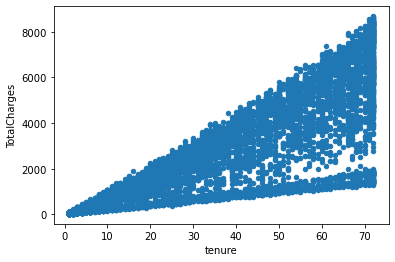

In [37]:
telco1.plot.scatter(x= 'tenure', y='TotalCharges')

In [38]:
x = telco1.tenure
y = telco1.TotalCharges
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.825880460933202
p = 0.0


In [39]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

Reject null hypothesis


Correlation between tenure and monthly charges & tenure and total charges for Internet

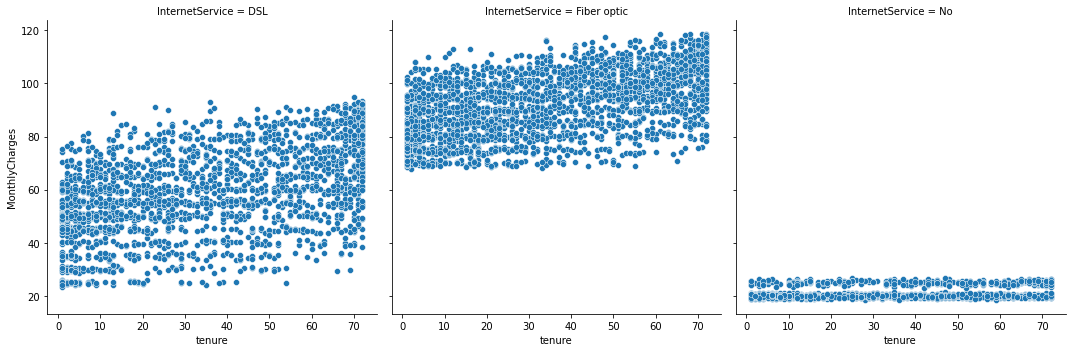

In [40]:
# Visualization of monthly charges over time by internet type

sns.relplot(data=telco1, y='MonthlyCharges', x='tenure', col='InternetService')


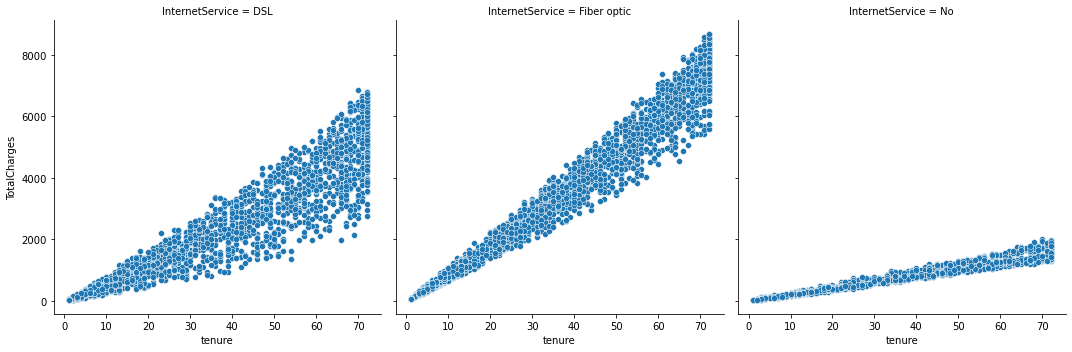

In [41]:
# Visualization of total charges over time by internet type

sns.relplot(data=telco1, y='TotalCharges', x='tenure', col='InternetService')


Correlation between tenure and monthly charges & tenure and total charges for Phone

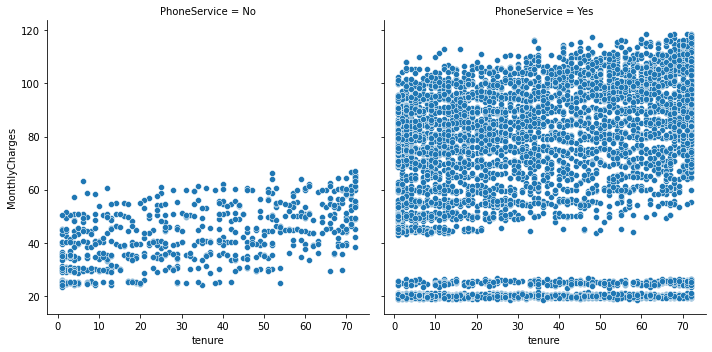

In [42]:
# Visualization of monthly charges over time for Phone

sns.relplot(data=telco1, y='MonthlyCharges', x='tenure', col='PhoneService')


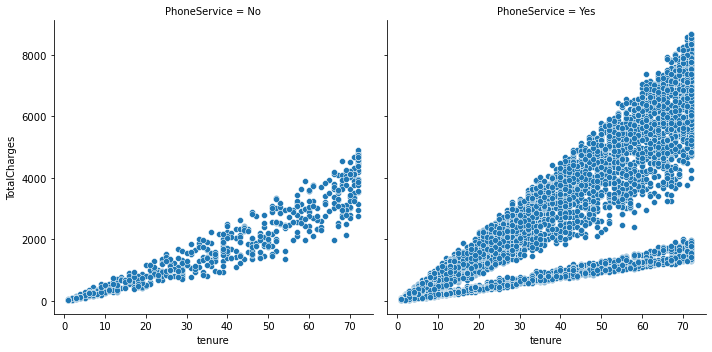

In [43]:
# Visualization of total charges over time for Phone
sns.relplot(data=telco1, y='TotalCharges', x='tenure', col='PhoneService')


Question  2
Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [44]:
import pandas as pd
import numpy as np



import env

from env import host, user, password

pd.read_sql('SELECT * FROM employees', env.get_db_url('employees') )

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [46]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

In [76]:
salary_over_time = pd.read_sql(query,  env.get_db_url('employees'))

salary_over_time.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


H_0: There is no linear relationship between tenure and salary.

H_a: There is there a linear relationship between tenure and salary.

<AxesSubplot:xlabel='tenure', ylabel='salary'>

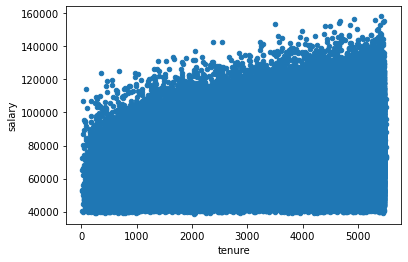

In [52]:
salary_over_time.plot.scatter(x= 'tenure', y='salary')

In [58]:
r,p = stats.pearsonr(salary_over_time.tenure, salary_over_time.salary)
print('r =', r)
print('p =', p)

r = 0.3064625613186077
p = 0.0


In [59]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

Reject null hypothesis


In [60]:
query_titles = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

In [62]:
titles_over_time = pd.read_sql(query_titles,  env.get_db_url('employees'))
titles_over_time.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


H_0: There is no linear relationship between tenure and number of titles.

H_a: There is there a linear relationship between tenure and number of titles.

<AxesSubplot:xlabel='tenure', ylabel='n_titles'>

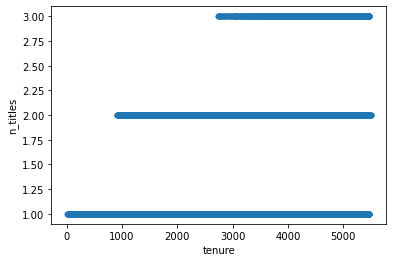

In [64]:
titles_over_time.plot.scatter(x= 'tenure', y='n_titles')

In [65]:
r,p = stats.pearsonr(titles_over_time.tenure, titles_over_time.n_titles)
print('r =', r)
print('p =', p)

r = 0.26659892991366185
p = 0.0


In [66]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

Reject null hypothesis


Question 3

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [67]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


H_0: There is no linear relationship between reaction time and number of days.

H_a: There is there a linear relationship between reaction time and number of days.

In [71]:
# getting count of subjects
sleep.Subject.value_counts()

308    10
309    10
371    10
370    10
369    10
352    10
351    10
350    10
349    10
337    10
335    10
334    10
333    10
332    10
331    10
330    10
310    10
372    10
Name: Subject, dtype: int64

In [72]:
# getting count of days
sleep.Days.value_counts()

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

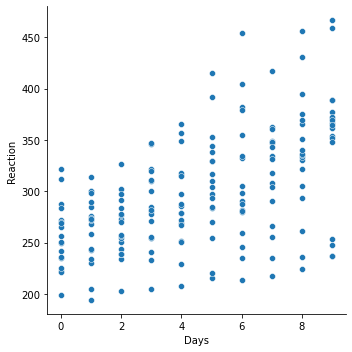

In [73]:
sns.relplot(data=sleep, y='Reaction', x='Days')

In [74]:
r, p =stats.pearsonr(sleep.Reaction, sleep.Days)

print('r =', r)
print('p =', p)

r = 0.5352302262650253
p = 9.894096322214812e-15


In [75]:
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

Reject null hypothesis


Comparing Group Membership - Chi Square

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 								Codeup Student	Not Codeup Student
Uses a Macbook								49	20
Doesn't Use A Macbook						1	30

In [77]:
index = ['Uses a Macbook', 'Does not Use a Macbook']
columns = ['CodeUp Student', 'Not a Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed


,CodeUp Student,Not a Codeup Student
Uses a Macbook,49,20
Does not Use a Macbook,1,30


In [78]:
stats.chi2_contingency(observed)

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [80]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [81]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [82]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Question 2

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [93]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [95]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto', 'Manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,Auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,Manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,Auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,Manual


In [96]:
# Transmission is dependent on manuafacture 
observed_mpg = pd.crosstab(mpg.manufacturer, mpg.transmission_type)
observed_mpg

transmission_type,Auto,Manual
manufacturer,,
audi,11,7
chevrolet,16,3
dodge,30,7
ford,17,8
honda,4,5
hyundai,7,7
jeep,8,0
land rover,4,0
lincoln,3,0


In [97]:
chi2, p, degf, expected = stats.chi2_contingency(observed_mpg)

In [98]:
print(pd.DataFrame(expected, index=observed_mpg.index, columns=observed_mpg.columns).to_markdown())

| manufacturer   |     Auto |    Manual |
|:---------------|---------:|----------:|
| audi           | 12.0769  |  5.92308  |
| chevrolet      | 12.7479  |  6.25214  |
| dodge          | 24.8248  | 12.1752   |
| ford           | 16.7735  |  8.2265   |
| honda          |  6.03846 |  2.96154  |
| hyundai        |  9.39316 |  4.60684  |
| jeep           |  5.36752 |  2.63248  |
| land rover     |  2.68376 |  1.31624  |
| lincoln        |  2.01282 |  0.987179 |
| mercury        |  2.68376 |  1.31624  |
| nissan         |  8.72222 |  4.27778  |
| pontiac        |  3.3547  |  1.6453   |
| subaru         |  9.39316 |  4.60684  |
| toyota         | 22.812   | 11.188    |
| volkswagen     | 18.1154  |  8.88462  |


In [102]:
print('Observed:\n')
print(observed_mpg)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed_mpg.index, columns=observed_mpg.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.19f}')
print(f'p value: {p:.19f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print(''' We can reject the null hypothesis. We can suggest that transmission type if not independent of manufacturer''')
else:
    print('We cannot reject the null hypothesis')

Observed:

transmission_type  Auto  Manual
manufacturer                   
audi                 11       7
chevrolet            16       3
dodge                30       7
ford                 17       8
honda                 4       5
hyundai               7       7
jeep                  8       0
land rover            4       0
lincoln               3       0
mercury               4       0
nissan                8       5
pontiac               5       0
subaru                7       7
toyota               20      14
volkswagen           13      14
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

transmission_type       Auto     Manual
manufacturer                           
audi               12.076923   5.923077
chevrolet          12.747863   6.252137
dodge              24.824786  12.175214
ford               16.773504   8.226496
honda               6.038462   2.961538
hyundai             9.393162   4.606838
jeep                5.367521   2.632479
land rover          2.683761   1.316239
lincoln   

Question 3

Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

In [103]:
query_dept = '''SELECT e.gender, d.dept_name
FROM employees AS e
JOIN dept_emp as dn ON dn.emp_no = e.emp_no
AND to_date > CURDATE()
JOIN departments AS d ON dn.dept_no = d.dept_no'''

In [105]:
dept_breakdown =  pd.read_sql(query_dept,  env.get_db_url('employees'))
dept_breakdown

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [121]:
dept_breakdown.dept_name.groupby([dept_breakdown.gender]).value_counts()

gender  dept_name         
F       Development           24533
        Production            21393
        Sales                 14999
        Customer Service       7007
        Research               6181
        Quality Management     5872
        Marketing              5864
        Human Resources        5147
        Finance                5014
M       Development           36853
        Production            31911
        Sales                 22702
        Customer Service      10562
        Research               9260
        Marketing              8978
        Quality Management     8674
        Human Resources        7751
        Finance                7423
Name: dept_name, dtype: int64